In [1]:
# === CORE UTILITIES ===
import pandas as pd
import numpy as np
import swifter
from tqdm import tqdm
tqdm.pandas()

# === TEXT PREPROCESSING ===
import re
import string
from bs4 import BeautifulSoup

# === NLP PIPELINE ===
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from textblob import TextBlob
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language

# === PSYCHOLINGUISTIC FEATURE EXTRACTION ===
import textstat                 # Readability scores
from empath import Empath       # Open-source LIWC-style lexicon
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# === VISUALIZATION ===
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import yellowbrick
import shap                     # For model explainability

# === MACHINE LEARNING ===
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# === SYSTEM / MISC ===
import os
import warnings
warnings.filterwarnings('ignore')


d:\Anaconda\envs\DeceptionNLP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# 1. Cleaning and Data Extraction

In [37]:
df = pd.read_csv('../Dataset/WELFake_Dataset.csv')

In [38]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [39]:
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [40]:
df.dropna(inplace = True)

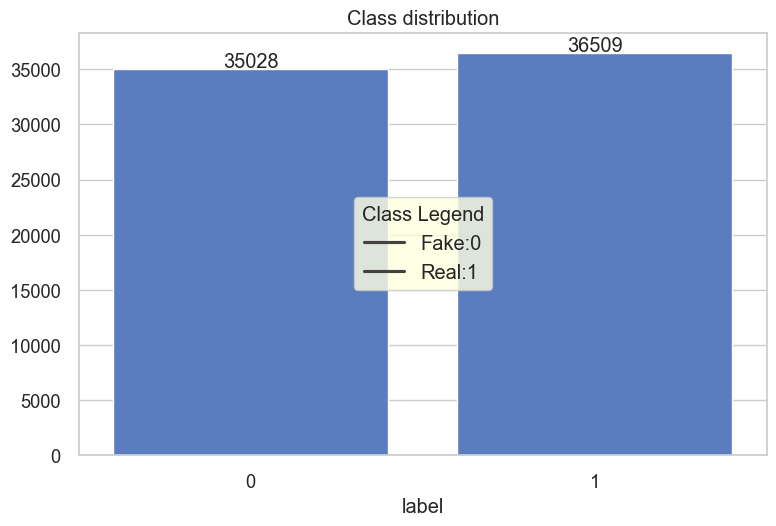

In [54]:
# Create the bar plot
ax = sns.barplot(x=df['label'].value_counts().index, 
                 y=df['label'].value_counts().values)
plt.title("Class distribution")

# Add legend
plt.legend(['Fake:0', 'Real:1'], loc='center', fontsize='medium', 
           frameon=True, facecolor='lightyellow', title='Class Legend')

# Add labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [56]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [57]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [59]:
import swifter
import re

Removing extra whitespaces.

In [61]:
def preprocess(text):
    text = text.lower()                      
    text = re.sub(r"\s+", " ", text)         
    return text.strip()                      

df['title'] = df['title'].swifter.apply(preprocess)
df['text'] = df['text'].swifter.apply(preprocess)

Pandas Apply: 100%|██████████| 71537/71537 [00:23<00:00, 3018.83it/s]


In [62]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
2,unbelievable! obama’s attorney general says mo...,"now, most of the demonstrators gathered last n...",1
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1
5,about time! christian group sues amazon and sp...,all we can say on this one is it s about time ...,1


Saving, this dataset (cleansed of whitespaces).

In [63]:
df.to_csv('../Dataset/WELFake_Dataset.csv')